**Convolutional Neural Network** - **CNN**


Là một **thuật toán** (Cũng có thể coi là một **mô hình**) trong **Deep learning** có nhiều ứng dụng đặc biệt là trong những bài toán cần nhận dạng vật thể (Object) trong ảnh.

Những ứng dụng mà ta có thể sử dụng CNN:

*   **Nhận dạng và phân loại hình ảnh**: Nhận diện khuôn mặt,nhận biết, phân loại các đối tượng,...
*  Ngoài ra còn **Xử lý ngôn ngữ tự nhiên**(NLP)

CNN có

*   Các loại lớp:


1.   **Convolutional Layer**: Lớp tích chập
2.   **Pooling Layer**: Lớp lọc giảm số chiều
3. **Fully Connected Layer**: Lớp Kết Nối Đầy Đủ

*  Một số thành phần:
1. Activation Function: Hàm kích hoạt
2. Loss Function: Hàm mất mát
3. Optimization algorithm: Thuật toán tối ưu
4. Kỹ thuật Dropout: Để giảm overfitting bằng cách tắt ngẫu nhiên một số neutron trong quá trình huấn luyện.



# I. Convolutional Layer
Tổng quan ta sẽ có các bước:


1.**Bộ lọc** (**Filter** hoặc **Kernel**):
* Bộ lọc là một ma trận nhỏ có kích thước thường nhỏ hơn hoặc bằng kích thước
của ảnh đầu vào.Thường là ma trận lẻ ( 3x3, 5x5,...)
* Mỗi bộ lọc được học để phát hiện một đặc trưng cụ thể trong ảnh.
* Thực tế thì mô hình cần nhận diện nhiều đặc trưng và đối tượng khác nhau nên **bộ lọc ngẫu nhiên** giúp mô hình học được các biểu diễn phức tạp và hiệu quả từ dữ liệu.
2.  **Áp dụng Bộ lọc và tích chập**:

*   Ví dụ:
Ta có ma trận 4*4  $( \mathbf{w} = \begin{bmatrix} w_1 & w_2 & w_3 & w_4 \\ w_5 & w_6 & w_7 & w_8 \\ w_9 & w_10 & w_11 & w_12 \\ w_13 & w_14 & w_15 & w_16 \end{bmatrix} )$

* Ma trận 3*3 $ ( \mathbf{v} = \begin{bmatrix} v_1 & v_2 & v_3 \\ v_4 & v_5 & v_6 \\ v_7 & v_8 & v_9 \end{bmatrix} )$

* Giả sử ta có bộ lọc $v$ và dữ liệu đầu vào $w$ thì ta áp dụng bộ lọc và tích chập ta sé được $z$ có kích cỡ bằng **size**(w) - **size**(v) + 1
Áp dụng z có : 4 - 3 + 1 = 2 . Kích cỡ z là 2 *2
$$z1 = w1 * v1 + w2 * v2 +...+ w9 *v9$$
Dịch sang phải 1 cột
$$z2 = w2*v1 + w3*v2 + w4 *v3+...+w12 *v9$$
Tương tự ta tính được z3 và z4
$$z3,z4$$
3. **Bản đồ đặc trưng** (**Feature Map**): Sau khi tích chập thì ta được z
$$( \mathbf{z} = \begin{bmatrix} z_1 & z_2  \\ z_3 & z_4   \end{bmatrix} )$$

* Bản đồ đặc trưng là kết quả của phép tích chập. Mỗi giá trị trên bản đồ đặc trưng đại diện cho một đặc trưng cụ thể được học từ dữ liệu.



In [ ]:
from IPython.display import Image

# URL của hình ảnh GIF
url = "https://i0.wp.com/nttuan8.com/wp-content/uploads/2019/03/giphy.gif?resize=474%2C345&ssl=1"

# Hiển thị hình ảnh GIF
Image(url=url)


**Tóm lại**: thông qua phép tích chập, mạng CNN có thể học được các đặc trưng cục bộ từ ảnh và sử dụng những đặc trưng này để thực hiện các nhiệm vụ như phân loại hình ảnh

In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Khởi tạo mô hình
model = Sequential()

# Thêm một Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

# Hiển thị cấu trúc của mô hình
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**II. Pooling Layer**![CNN.webp](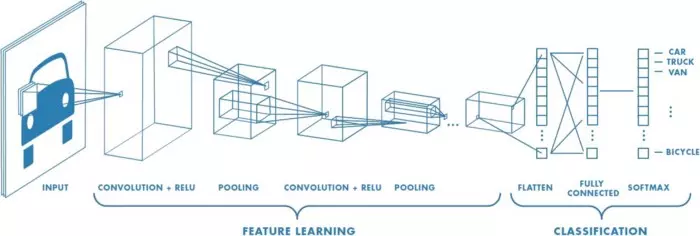![cnn.png](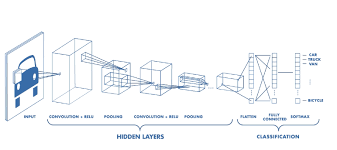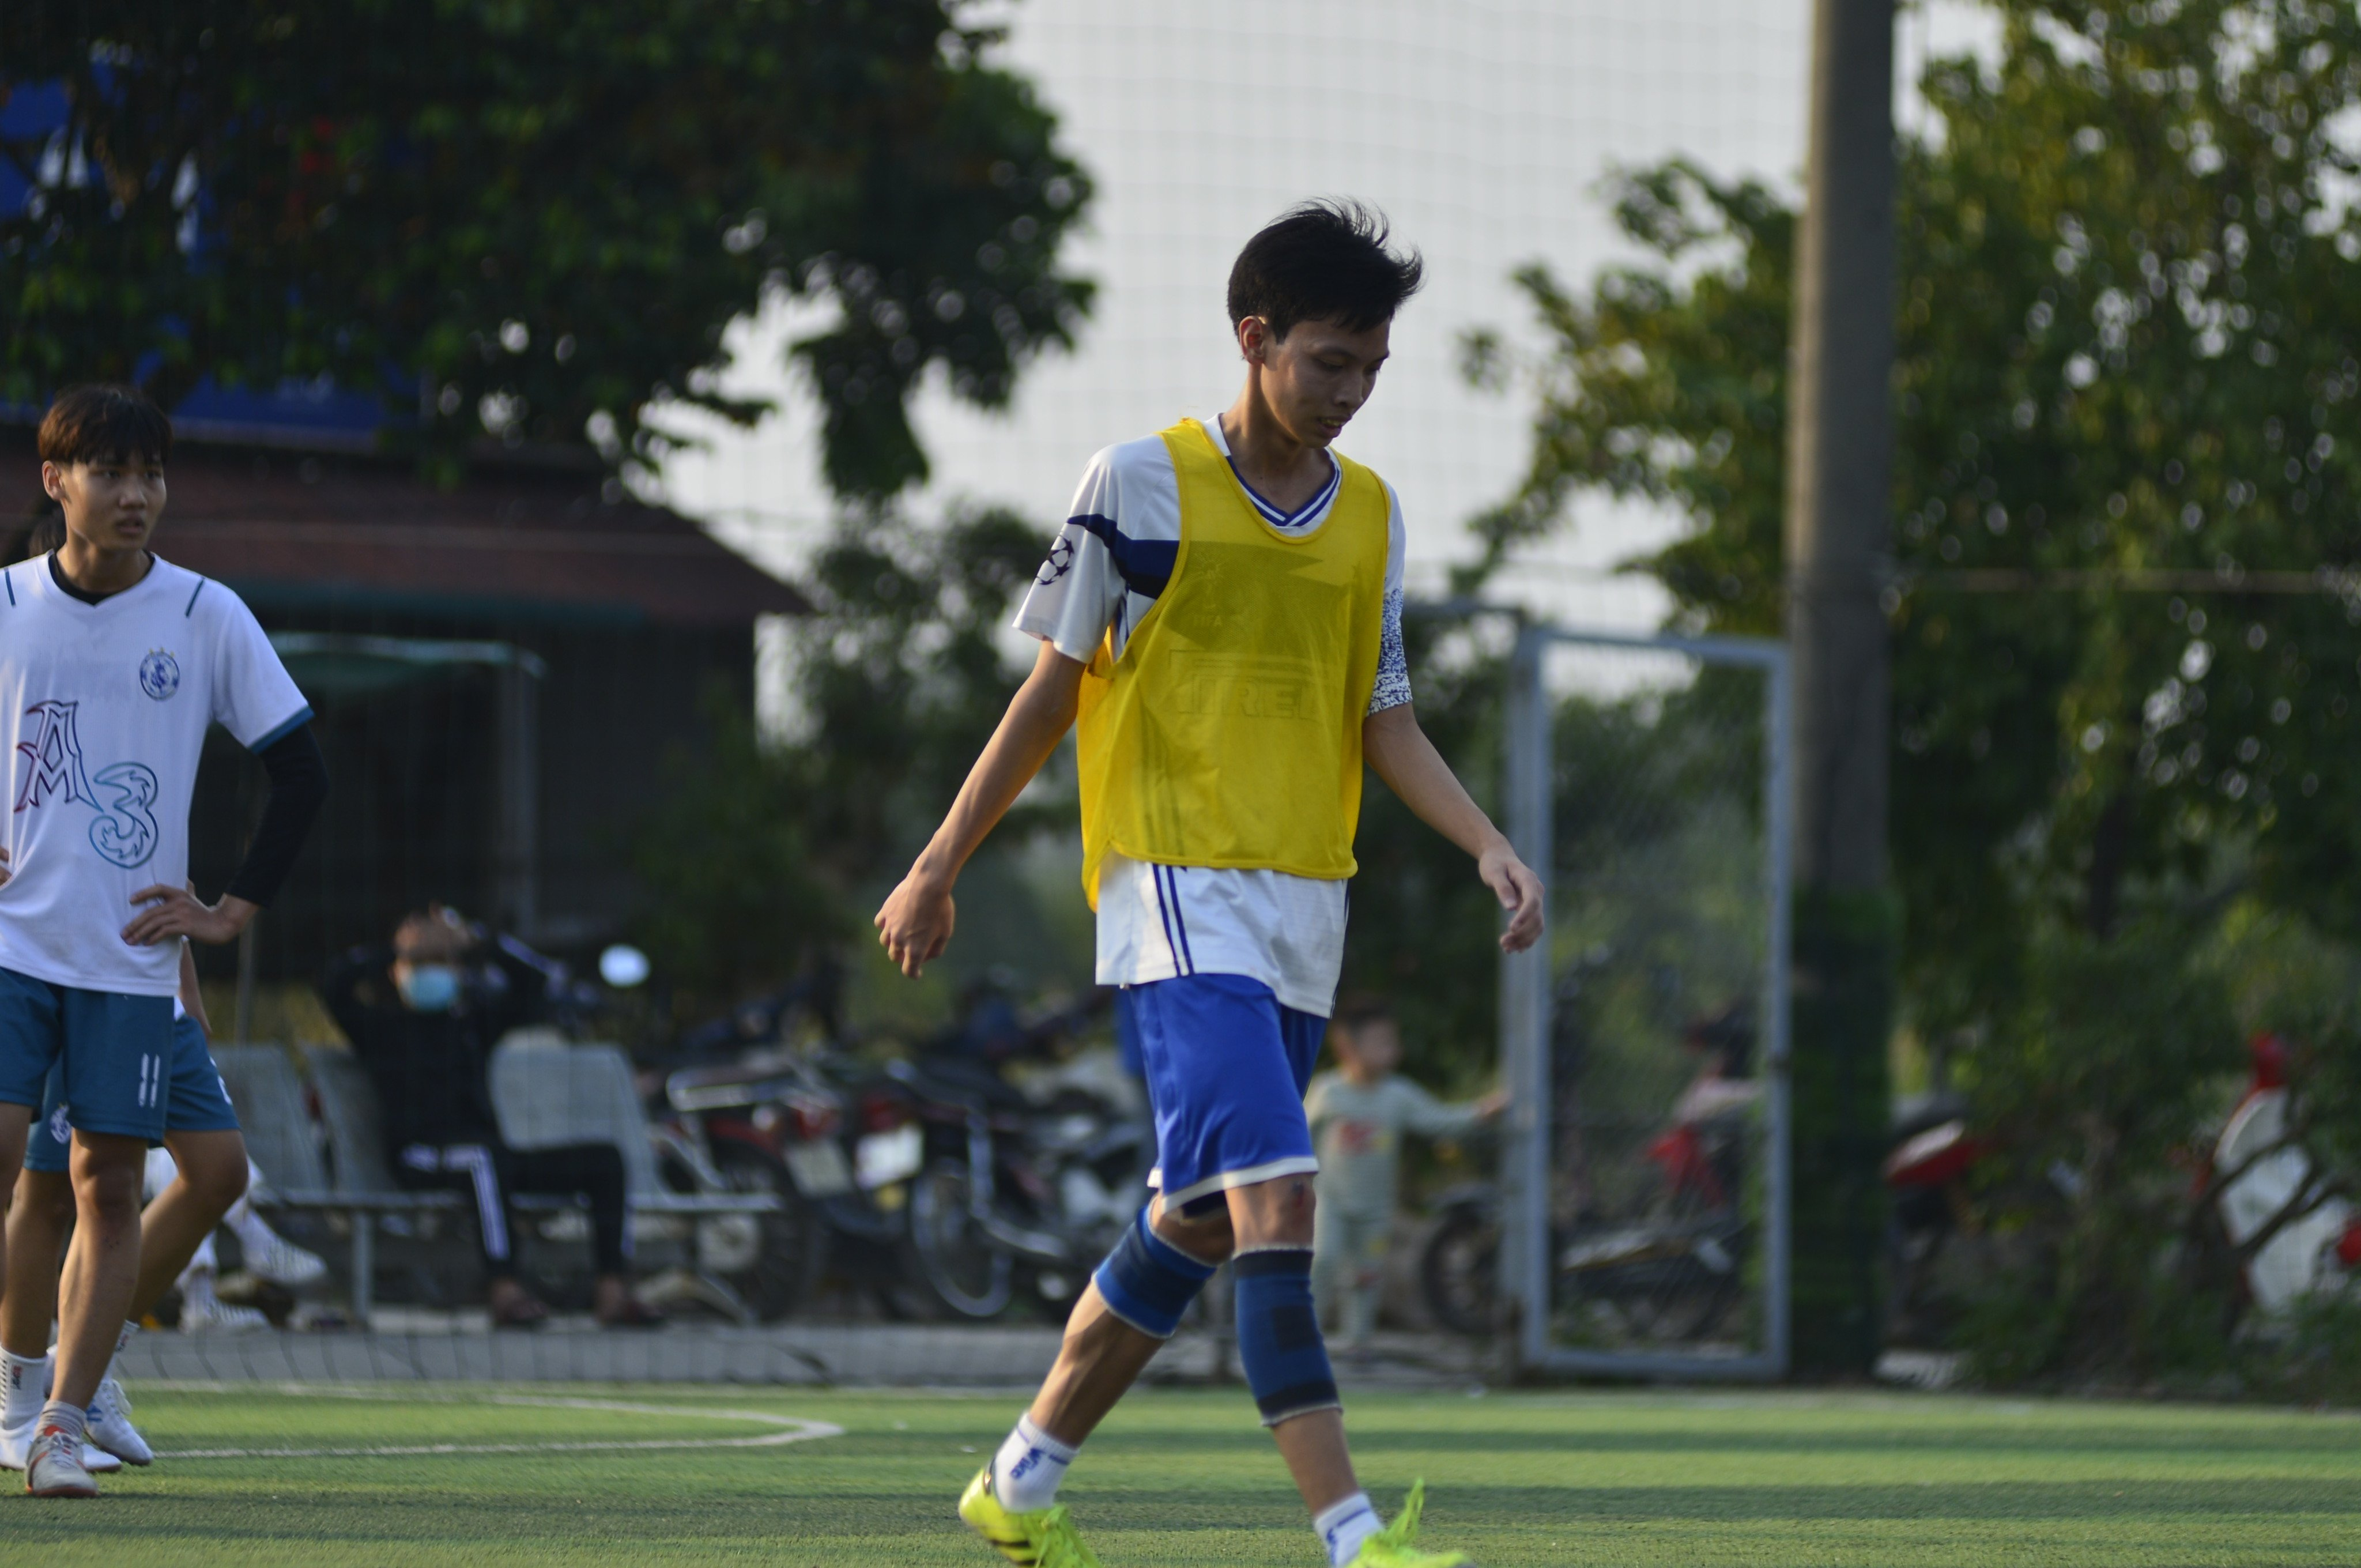))



1. Lớp pooling thường được sử dụng ngay sau lớp convulational để đơn giản hóa thông tin đầu ra để giảm bớt số lượng neuron.
2. Có 2 loại Pooling phổ biến là:
*  **Max Pooling**: Trong Max Pooling, cho mỗi vùng không gian nhỏ của biểu diễn đặc trưng, chỉ giữ lại giá trị lớn nhất. Ví dụ, nếu chia mỗi biểu diễn thành các ô 2x2, Max Pooling sẽ giữ lại giá trị lớn nhất từ mỗi ô.
*   **Average Pooling**:Trong Average Pooling, thay vì lấy giá trị lớn nhất, ta lấy giá trị trung bình của các giá trị trong vùng không gian.
3. **Mục tiêu của lớp Pooling** là giảm số lượng tham số và tính toán trong mô hình, giúp tăng cường khả năng tổng quát hóa và giảm nguy cơ quá mức quá mức khớp (overfitting). Ngoài ra, việc giảm kích thước của biểu diễn đặc trưng cũng giúp tăng tốc quá trình huấn luyện và giảm bớt độ phức tạp của mô hình.
4. Ví dụ:


In [ ]:

from IPython.display import Image

# URL của hình ảnh GIF
url = "https://production-media.paperswithcode.com/methods/MaxpoolSample2.png"

# Hiển thị hình ảnh GIF
Image(url=url)



III. Fully Connected Layer
1. thường được sử dụng để thực hiện các tác vụ như phân loại và dự đoán. Cụ thể, lớp này giúp kết hợp các đặc trưng đã được trích xuất từ các lớp Convolutional và Pooling trước đó để tạo ra một biểu diễn tổng hợp của dữ liệu, từ đó thực hiện quá trình phân loại.
2.
* Giả sử  có một CNN được thiết kế để phân loại hình ảnh thành các lớp như "mèo," "chó," và "xe hơi."
* Sau các lớp Convolutional và Pooling,  có một biểu diễn đặc trưng của hình ảnh.
* Lớp Fully Connected Layer cuối cùng có số lượng nơ-ron bằng số lượng lớp cần phân loại, ví dụ 3 nơ-ron cho "mèo," "chó," và "xe hơi."
* Các giá trị đầu ra từ lớp Fully Connected Layer này được đưa qua hàm softmax để tạo ra xác suất phân phối trên các lớp, và lớp có xác suất cao nhất sẽ được coi là kết quả dự đoán.

In [ ]:

from IPython.display import Image

# URL của hình ảnh GIF
url = "https://pbcquoc.github.io/images/cnn_model.png"

# Hiển thị hình ảnh GIF
Image(url=url)

[Link đọc thêm](https://stanford.edu/~shervine/l/vi/teaching/cs-230/cheatsheet-convolutional-neural-networks)

In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


170498071/170498071 [==============================] - 5s 0us/step
Epoch 1/10
 850/1563 [===============>..............] - ETA: 35s - loss: 1.6830 - accuracy: 0.3801

KeyboardInterrupt: 

1. TensorFlow là một thư viện mã nguồn mở dùng cho học máy và học sâu. Keras là một API cao cấp để xây dựng và huấn luyện các mô hình trong TensorFlow.
2. **Tải và tiền xử lý dữ liệu**

*   (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

*    tải tập dữ liệu CIFAR-10 sử dụng hàm load_data(). CIFAR-10 là một tập dữ liệu gồm 60,000 hình ảnh màu 32x32, được chia thành 10 lớp, với 6,000 hình ảnh mỗi lớp. Có 50,000 hình ảnh đào tạo và 10,000 hình ảnh thử nghiệm. Sau đó, chúng ta chuẩn hóa các giá trị pixel để nằm trong khoảng từ 0 đến 1.
3. **Xây dựng mô hình CNN**


*   model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

*    xây dựng mô hình CNN bằng cách sử dụng mô hình tuần tự của Keras và thêm các lớp Convolutional và Pooling. Lớp Conv2D tạo ra một lớp tích chập với số lượng bộ lọc được chỉ định (ví dụ: 32 hoặc 64) và kích thước bộ lọc (3,3). Hàm kích hoạt ‘relu’ được sử dụng sau mỗi lớp Conv2D. Lớp MaxPooling2D thực hiện một hoạt động gọi là max pooling, giảm kích thước không gian đầu vào.
4.


*   model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

*   Sau khi thêm các lớp Convolutional và Pooling, chúng ta thêm các lớp Dense (hoặc Fully Connected). Lớp Flatten chuyển đổi tensor đầu vào thành một vector 1D. Lớp Dense thêm một lớp neuron được kết nối đầy đủ.

5. **Biên dịch và huấn luyện mô hình**


*   model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

*  Cuối cùng, chúng ta biên dịch mô hình bằng cách chỉ định trình tối ưu hóa, hàm mất mát và các số liệu để theo dõi trong quá trình huấn luyện. Sau đó, chúng ta huấn luyện mô hình bằng cách sử dụng dữ liệu đào tạo và kiểm tra.








